<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Ron, my name is Dmitrii. I'm going to review your project! Nice to meet you! 🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1:</b>
    
<b>Overall Feedback:</b> 
    
- Overall well done! I can see that a lot of effort has been made! Your project looks (almost) flawless, and you accomplished impressive results.
- No critical comments/corrections. Congratulations! But I left some feedback that hopefully could be helpful in the next sprints/projects.

Wish you good luck in the next sprints :)


</div>

# Project description
You work as an analyst for the telecom operator Megaline. The company
offers its clients two prepaid plans, Surf and Ultimate. The commercial
department wants to know which of the plans brings in more revenue in order
to adjust the advertising budget.



# Project's Goal

Analyze clients' behavior and determine which prepaid plan brings in more revenue.


<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
- It would be great to add additional information about project tasks. It gives an overview of what you are going to achieve in this project.
- Also, this introduction potentially can be used as a Readme file in your portfolio on Github. One example of a nice introduction for a data analysis project can be found here: [https://github.com/CICIFLY/Data-Analytics-Projects/blob/master/AB%20Testing%20Result%20Analyze/readme.md](https://github.com/CICIFLY/Data-Analytics-Projects/blob/master/AB%20Testing%20Result%20Analyze/readme.md)
    
</div>

## Open the data files and study the general information

In [1]:
#import libraries
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from scipy import stats as st
from scipy.stats import levene
import math as mt
from functools import reduce

#ignorning warning
warnings.simplefilter ('ignore')

#make a try-except block in order to avoid file path error when working both locally and remotely.
try:
    df_calls = pd.read_csv('megaline_calls.csv')
    df_internet = pd.read_csv('megaline_internet.csv')
    df_msg = pd.read_csv('megaline_messages.csv')
    df_plans = pd.read_csv('megaline_plans.csv')
    df_users = pd.read_csv('megaline_users.csv')
except:
    df_calls = pd.read_csv('/datasets/megaline_calls.csv')
    df_internet = pd.read_csv('/datasets/megaline_internet.csv')
    df_msg = pd.read_csv('/datasets/megaline_messages.csv')
    df_plans = pd.read_csv('/datasets/megaline_plans.csv')
    df_users = pd.read_csv('/datasets/megaline_users.csv')
    


In [2]:
#dict to iterate over all dfs together
dfs = {
  "df_calls": df_calls,
  "df_internet": df_internet,
    "df_msg": df_msg,
    "df_plans": df_plans,
    "df_users": df_users    
}

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Great that all imports and data load are grouped in different cells before the project. 
</div>

Check the tables first 5 rows to see the general information.

In [3]:
for k,v in dfs.items():
    print('\n{}\n{}'.format(k, v.head()))


df_calls
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22

df_internet
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22

df_msg
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26

df_plans
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_mes

Check the tables general structure.

In [4]:
for k,v in dfs.items():
    print('\n\n'+ k)
    v.info()



df_calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


df_internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


df_msg
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


df_plans
<class 'pandas.core.frame.DataFrame'>
Ra

percentage of missing values in all dataframes

In [5]:
for k,v in dfs.items():
    print('\n{}\n{}'.format(k, v.isna().mean()))


df_calls
id           0.0
user_id      0.0
call_date    0.0
duration     0.0
dtype: float64

df_internet
id              0.0
user_id         0.0
session_date    0.0
mb_used         0.0
dtype: float64

df_msg
id              0.0
user_id         0.0
message_date    0.0
dtype: float64

df_plans
messages_included        0.0
mb_per_month_included    0.0
minutes_included         0.0
usd_monthly_pay          0.0
usd_per_gb               0.0
usd_per_message          0.0
usd_per_minute           0.0
plan_name                0.0
dtype: float64

df_users
user_id       0.000
first_name    0.000
last_name     0.000
age           0.000
city          0.000
reg_date      0.000
plan          0.000
churn_date    0.932
dtype: float64


We have no missing values besides churn_date column in the users df, which refers to the date the user stopped using the service, missing means the calling plan was being used when this data was generated.

Checking for duplicates

In [6]:
for k,v in dfs.items():
    print('\n{}\n{}'.format(k, v.duplicated().sum()))


df_calls
0

df_internet
0

df_msg
0

df_plans
0

df_users
0


looking for common columns between dfs

In [7]:
for k,v in dfs.items():
    print('\n{}\n{}'.format(k, v.columns.tolist()))


df_calls
['id', 'user_id', 'call_date', 'duration']

df_internet
['id', 'user_id', 'session_date', 'mb_used']

df_msg
['id', 'user_id', 'message_date']

df_plans
['messages_included', 'mb_per_month_included', 'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan_name']

df_users
['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan', 'churn_date']


Checking for the tables general statistics

In [8]:
for k,v in dfs.items():
    print('\n{}\n{}'.format(k, v.describe()))


df_calls
             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000

df_internet
             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000

df_msg
            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000

df_plans
       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000

Checking how much unanswered calls compared to total calls

In [9]:
df_calls['duration'].value_counts() 
missed_call_prec = (26834 / len(df_calls)) * 100
missed_call_prec

19.482339274694162

Checking how much users didnt use internet at all compared to total users

In [10]:
df_internet['mb_used'].value_counts() 
no_internet_prec = (13747 / len(df_internet)) * 100
no_internet_prec

13.11423801574052

### Conclusion
#### After having a look at the table's general information, We discovered useful information regarding our data.

##### there are no duplicates in our data
##### There is 1 column that contains missing values across the data.
df_users.churn_date is the only column with missing values, but those missing values have a meaning - the plan was being used 
when this data was generated. we will replace the missing value with None -this means there is no churn_date as the user still uses the plan.

##### There are several columns that their datatype should be changed.
All the date related columns should be changed to date type. (except churn_date that will contain the word 'None' - an object)

df_calls.duration column will be rounded up and changed to int.

##### Values measurement unit will be changed 
We know the plans are measured by gb and our column is represented with mb(df_internet.mb_used). 
We will add a column with  the representation of gb according to the plans rules:
For calls, each individual call is rounded up: even if the call lasted
just one second, it will be counted as one minute. (1s = 1m, 61s = 2m)
For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up (i.e; 1mb = 1gb, 1025mb = 2gb). 

#####  Abnormal values analysis
Values of 0 in call_duration(19.4%) will be considered unanswered call, and values of 0 in mb_used(13.1%) are considered 0 usage in the session.

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v1</b>
Great start! Now we got a first look at the data and you already identified all issues with the data.</div>

## Data preperation

### covert datatypes

In [11]:
#function to convert object columns with dates to date dtype
def obj_to_dt(df, column):
    df[column] =  pd.to_datetime(df[column], format='%Y-%m-%d')
    

In [12]:
obj_to_dt(df_calls,'call_date')
obj_to_dt(df_internet, 'session_date')
obj_to_dt(df_msg, 'message_date')
obj_to_dt(df_users, 'reg_date')

rounding up df_calls.duration column and changing to int type.

In [13]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil)
df_calls['duration'] = df_calls['duration'].astype(int)

In [14]:
#round up monthly mb usage to gb per user

<div class="alert alert-warning">
<b>Reviewer's comment v1</b>
    
Good that you did not forget about rounding. 

It is also possible to use np.ceil() method to round a number to the next integer. 

```
calls['duration'] = np.ceil(calls['duration'])
```

</div>

### fill missing values

fill churn_date missing values with None

In [15]:
#fill churn_date missing values with None
df_users['churn_date'] = df_users['churn_date'].fillna('None')

### find  number of calls made and minutes used per month, number of text messages sent per month And the volume of data per month, per user per month.

adding month column to group by months for the calculations

In [16]:
df_calls['month'] = df_calls['call_date'].dt.month
df_internet['month'] = df_internet['session_date'].dt.month
df_msg['month'] = df_msg['message_date'].dt.month

In [17]:
#calls_group = df_calls.groupby(['user_id','month'])[['user_id', 'month','duration']].agg({'duration': ['sum']})
#calls_group = df_calls.groupby(['user_id','month'])
internet_group = df_internet.groupby(['user_id','month']).agg({'mb_used': 'sum'}).reset_index()
msg_group = df_msg.groupby(['user_id','month']).agg({'message_date': 'count'}).reset_index()
calls_group = df_calls.groupby(['user_id','month']).agg({'duration':'sum'}).reset_index()
users_group = df_users

creating a new df with new  columns of mins per month, msgs per month, and volume of data, groped by user and month.

In [18]:
data_frames = [calls_group, internet_group, msg_group]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],
                                        how='outer'), data_frames)

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Great. how = 'outer' is fine here in order not to lose data.

</div>

storing user_id and plan to add to the merged df

In [19]:
test = df_users[['user_id','plan']]

adding plan column

In [20]:
data_frames2 = [df_merged, test]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id'],
                                        how='outer'), data_frames2)

In [21]:
df_merged.head()

,user_id,month,duration,mb_used,message_date,plan
0,1000,12.0,124.0,1901.47,11.0,ultimate
1,1001,8.0,182.0,6919.15,30.0,surf
2,1001,9.0,315.0,13314.82,44.0,surf
3,1001,10.0,393.0,22330.49,53.0,surf
4,1001,11.0,426.0,18504.30,36.0,surf


checking for null values

In [22]:
df_merged[pd.isnull(df_merged).any(axis=1)]

,user_id,month,duration,mb_used,message_date,plan
29,1009,5.0,534.0,20389.40,NaN,surf
30,1009,6.0,823.0,18845.90,NaN,surf
31,1009,7.0,880.0,30421.65,NaN,surf
32,1009,8.0,731.0,24557.52,NaN,surf
33,1009,9.0,776.0,20962.40,NaN,surf
...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,surf
2299,1319,NaN,NaN,NaN,NaN,surf
2300,1378,NaN,NaN,NaN,NaN,surf
2301,1463,NaN,NaN,NaN,NaN,ultimate


we will fill the missing values with 0 as we sum the values in order to get the revenue , missing means 0 

filling missing values with 0

In [23]:
df_merged = df_merged.fillna(0)

Coverting mb to gb by the plans rules - rounding up.

In [24]:
df_merged['mb_used'] = (df_merged['mb_used'] / 1024)

In [25]:
df_merged['mb_used'] = df_merged['mb_used'].apply(np.ceil)

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
    
Well done! Here is also everything is correct. 

</div>

changing column names

In [26]:
df_merged.columns = ['user_id','month','call_duration','gb_used','msg_count','plan']

changing datatypes for rounded float numbers to int

In [27]:
df_merged = df_merged.astype ({"call_duration":"int64", "gb_used":"int64", "msg_count":"int64","month":"int64"})

Calculating monthly revenue from each user 

In [28]:
#creating a function that will go row by row and find the costs 
def revenue(row):
    calls=row['call_duration']
    gb=row['gb_used']
    msg=row['msg_count']
    plan=row['plan']
    
    #finding the calls cost
    if plan == 'surf' and calls <= 500:
        cost_calls = 0
    elif plan == 'surf' and calls > 500:
        cost_calls = (calls - 500) * 0.03
    elif plan == 'ultimate' and calls <= 3000:
        cost_calls = 0
    elif plan == 'ultimate' and calls > 3000:
        cost_calls = (calls - 3000) * 0.01
    
    #finding the data usage cost
    if plan == 'surf' and gb <= 15:
        cost_gb = 0
    elif plan == 'surf' and gb > 15:
        cost_gb = (gb - 15) * 10
    elif plan == 'ultimate' and gb <= 30:
        cost_gb = 0
    elif plan == 'ultimate' and gb > 30:
        cost_gb = (gb - 30) * 7
        
    #finding msg cost
    if plan == 'surf' and msg <= 50:
        cost_msg = 0
    elif plan == 'surf' and msg > 50:
        cost_msg = (msg - 50) * 0.03
    elif plan == 'ultimate' and msg <= 1000:
        cost_msg = 0
    elif plan == 'ultimate' and msg > 1000:
        cost_msg = (msg - 1000) * 0.01
    
    #plans costs
    if plan == 'surf':
        cost_plan = 20
    else:
        cost_plan = 70
        
        
    #now calculate the total cost by simply summing it all up
    total_cost=cost_calls+cost_gb+cost_msg+cost_plan
    return total_cost

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1</b>

Great, that you created a function to calculate revenue. 

However, it is better to avoid hard-coding in your code of all values from the data plans. These values could be frequently updated and it will be annoyingly inconvenient to update them once again in the code. I would recommend to use an actual table with values or create a separate data dictionary - https://towardsdatascience.com/12-examples-to-master-python-dictionaries-5a8bcd688c6d
    
It is also possible to make the calculation of revenue a little bit shorter / easier using np.where - https://numpy.org/doc/stable/reference/generated/numpy.where.html

      np.where ('condition: if exceeding the package limit', 'multiply the difference by the price of additional services', '0')
    
</div>

In [29]:
# apply our function to every row of our data.
df_merged['monthly_revenue']=df_merged.apply(revenue,axis=1)

In [30]:
df_merged.head()

,user_id,month,call_duration,gb_used,msg_count,plan,monthly_revenue
0,1000,12,124,2,11,ultimate,70.00
1,1001,8,182,7,30,surf,20.00
2,1001,9,315,14,44,surf,20.00
3,1001,10,393,22,53,surf,90.09
4,1001,11,426,19,36,surf,60.00


creating a df to see monthly users per plan

In [32]:
monthly_users = df_merged.groupby(['plan','month']).agg({'user_id': 'count'}).reset_index()

In [33]:
monthly_users = monthly_users.drop(monthly_users[monthly_users.month == 0].index)
monthly_users.columns = ['plan', 'month', 'users_count']

In [34]:
monthly_users.head()

,plan,month,users_count
1,surf,1,2
2,surf,2,9
3,surf,3,23
4,surf,4,50
5,surf,5,77


### Conclusion

We have taken care of data type conversion, filled missing values, and made a new dataframe that shows us 
the user's monthly revenue by his consumptions (calls, msgs, data usage, plan).
by looking at the initial statistics of the table,
We see that our mean monthly revenue for all users from both plans is 64.24$.
By our monthly_users df, we see that the users count is growing as the year progresses.

## Data Analysis

#### Find the minutes, texts, and volume of data the users of each plan require per month. 

In [35]:
plans_usage = df_merged.groupby(['plan','month']).agg({'call_duration': 'sum','gb_used': 'sum', 'msg_count': 'sum'}).reset_index()

In [36]:
plans_usage.head()

,plan,month,call_duration,gb_used,msg_count
0,surf,0,0,0,0
1,surf,1,406,10,21
2,surf,2,2673,110,108
3,surf,3,7590,312,351
4,surf,4,17577,611,870


removing the 0 month row as those are users that have no info beside their plan, and we cant assume which month they are in.

In [37]:
plans_usage = plans_usage.drop(plans_usage[plans_usage.month == 0].index)

In [38]:
plans_usage = plans_usage.reset_index(drop=True)

adding the users_count from the monthly_users df to see correlation between number of users and our usage metrics

In [39]:
data_frames = [plans_usage, monthly_users]
plans_usage = reduce(lambda  left,right: pd.merge(left,right,on=['plan','month'],
                                        how='inner'), data_frames)

In [40]:
plans_usage = plans_usage[['plan', 'month', 'users_count', 'call_duration', 'gb_used','msg_count']]

In [41]:
plans_usage.head()

,plan,month,users_count,call_duration,gb_used,msg_count
0,surf,1,2,406,10,21
1,surf,2,9,2673,110,108
2,surf,3,23,7590,312,351
3,surf,4,50,17577,611,870
4,surf,5,77,30768,1087,1849


In [42]:
plans_usage.corr()

,month,users_count,call_duration,gb_used,msg_count
month,1.000000,0.842389,0.846793,0.850670,0.878902
users_count,0.842389,1.000000,0.997073,0.997171,0.981112
call_duration,0.846793,0.997073,1.000000,0.998866,0.989256
gb_used,0.850670,0.997171,0.998866,1.000000,0.990467
msg_count,0.878902,0.981112,0.989256,0.990467,1.000000


##### conclusion

We see strong correlations between our number of users , to the months - increasing as the year progresses,
and so are all the usage metrics - increasing with the amount of users and as the year progresses - (bigger month = more users) (more users = more usage)

#### Calculate the mean, variance, and standard deviation.

adding mean columns for calls, gb, msgs per plan per month

In [43]:
def mean_calls(row):
    calls=row['call_duration']
    users=row['users_count']    
    #finding the calls mean per plan per month
    mean_calls = calls / users
    return mean_calls

In [44]:
def mean_gb(row):
    gb=row['gb_used']
    users=row['users_count']    
    #finding the gb mean per plan per month
    mean_gb = gb / users
    return mean_gb

In [45]:
def mean_msg(row):
    msg=row['msg_count']
    users=row['users_count']    
    #finding the msg mean per plan per month
    mean_msg = msg / users
    return mean_msg

applying the functions to the df to create the new columns

In [46]:
plans_usage['mean_calls']=plans_usage.apply(mean_calls,axis=1)
plans_usage['mean_gb']=plans_usage.apply(mean_gb,axis=1)
plans_usage['mean_msg']=plans_usage.apply(mean_msg,axis=1)


In [47]:
plans_usage.head()

,plan,month,users_count,call_duration,gb_used,msg_count,mean_calls,mean_gb,mean_msg
0,surf,1,2,406,10,21,203.000000,5.000000,10.500000
1,surf,2,9,2673,110,108,297.000000,12.222222,12.000000
2,surf,3,23,7590,312,351,330.000000,13.565217,15.260870
3,surf,4,50,17577,611,870,351.540000,12.220000,17.400000
4,surf,5,77,30768,1087,1849,399.584416,14.116883,24.012987


Creating functions to find std and variance per plan per month as requested

In [48]:
def plan_month_std(row, metric):
    plan=row['plan']
    month=row['month']    
    #finding the std per plan per month per metric
    if plan == 'surf':
        call_std = df_merged.query('plan == "surf" and month == @month')[metric].std()
    else:
        call_std = df_merged.query('plan == "ultimate" and month == @month')[metric].std()
    return call_std

In [49]:
def plan_month_var(row, metric):
    plan=row['plan']
    month=row['month']    
    #finding the var per plan per month per metric
    if plan == 'surf':
        call_var = df_merged.query('plan == "surf" and month == @month')[metric].var()
    else:
        call_var = df_merged.query('plan == "ultimate" and month == @month')[metric].var()
    return call_var

In [50]:
plans_usage['std_calls']=plans_usage.apply(plan_month_std,axis=1,metric='call_duration')
plans_usage['std_gb']=plans_usage.apply(plan_month_std,axis=1,metric='gb_used')
plans_usage['std_msg']=plans_usage.apply(plan_month_std,axis=1,metric='msg_count')
plans_usage['var_calls']=plans_usage.apply(plan_month_var,axis=1,metric='call_duration')
plans_usage['var_gb']=plans_usage.apply(plan_month_var,axis=1,metric='gb_used')
plans_usage['var_msg']=plans_usage.apply(plan_month_var,axis=1,metric='msg_count')


In [51]:
plans_usage.head(30)

,plan,month,users_count,call_duration,gb_used,msg_count,mean_calls,mean_gb,mean_msg,std_calls,std_gb,std_msg,var_calls,var_gb,var_msg
0,surf,1,2,406,10,21,203.000000,5.000000,10.500000,125.865007,4.242641,14.849242,15842.000000,18.000000,220.500000
1,surf,2,9,2673,110,108,297.000000,12.222222,12.000000,228.531179,6.437736,19.646883,52226.500000,41.444444,386.000000
2,surf,3,23,7590,312,351,330.000000,13.565217,15.260870,189.233622,7.999012,18.616262,35809.363636,63.984190,346.565217
3,surf,4,50,17577,611,870,351.540000,12.220000,17.400000,225.536567,7.497728,22.396246,50866.743265,56.215918,501.591837
4,surf,5,77,30768,1087,1849,399.584416,14.116883,24.012987,244.446763,7.627813,29.106652,59754.219754,58.183527,847.197198
5,surf,6,97,41836,1502,2454,431.298969,15.484536,25.298969,213.524304,6.910308,30.247646,45592.628436,47.752363,914.920103
6,surf,7,121,54448,2042,3271,449.983471,16.876033,27.033058,246.992105,7.840674,30.395979,61005.099725,61.476171,923.915565
7,surf,8,162,66438,2735,4662,410.111111,16.882716,28.777778,233.119381,8.451091,32.086064,54344.645963,71.420942,1029.515528
8,surf,9,194,80360,3238,5968,414.226804,16.690722,30.762887,215.860971,7.017167,31.683268,46595.958656,49.240639,1003.829496
9,surf,10,237,101846,4126,8020,429.729958,17.409283,33.839662,228.645280,7.792679,35.713663,52278.664056,60.725846,1275.465708


storing each plan's call durations, data usage,and msgs to plot

In [52]:
surf_calls = plans_usage.query('plan == "surf"')['call_duration']
ult_calls = plans_usage.query('plan == "ultimate"')['call_duration']

surf_gb = plans_usage.query('plan == "surf"')['gb_used']
ult_gb = plans_usage.query('plan == "ultimate"')['gb_used']

surf_msg = plans_usage.query('plan == "surf"')['msg_count']
ult_msg = plans_usage.query('plan == "ultimate"')['msg_count']

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1</b>

Once again, everything is correct, but what conclusions is possible to make based on these calculations? 
</div>

##### call duration histogram between plans by months distribution

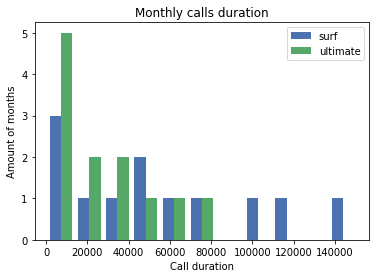

In [53]:
plt.style.use('seaborn-deep')
#bins from the lowest value to the maximum
bins = np.linspace(406, 150680, 12)
plt.hist([surf_calls, ult_calls], bins, label=['surf', 'ultimate'])
plt.legend(loc='upper right')
plt.title('Monthly calls duration')
plt.xlabel('Call duration')
plt.ylabel('Amount of months')

plt.show()

#### Description

This graph shows that both lowest and highest amount of call duration belongs to the surf plan.
The surf plan's distribution is wider, and is more skewed to the right. (mean=56201, median=48142)
The ultimate's distribution is less wider, and has more months with lower values.(mean=25827, median=21316)

We can also see a decrease in the amount of months as the call duration increases.

Both plans have their highest amount of months(3 for surf, 5 for ultimate) in a relative low value area(below 20000)



##### data usage (gb) histogram between plans by months distribution

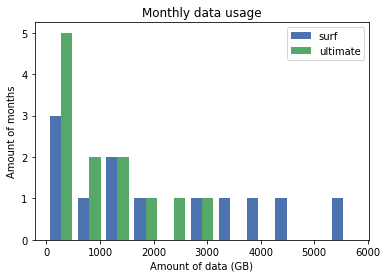

In [54]:
#bins from the lowest value to the maximum
bins = np.linspace(10, 5800, 12)
plt.hist([surf_gb, ult_gb], bins, label=['surf', 'ultimate'])
plt.legend(loc='upper right')
plt.title('Monthly data usage')
plt.xlabel('Amount of data (GB)')
plt.ylabel('Amount of months')

plt.show()

#### Description

This graph shows that both lowest and highest amount of data usage belongs to the surf plan.
The surf plan's distribution is wider, and is more skewed to the right. (mean=2185, median=1772)
The ultimate's distribution is less wider, and has more months with lower values.(mean=1038, median=849)

We can also see a decrease in the amount of months as the data usage increases.

Both plans have their highest amount of months(3 for surf, 5 for ultimate) in a relative low value area(below 1000).



##### amount of messages histogram between plans by months distribution

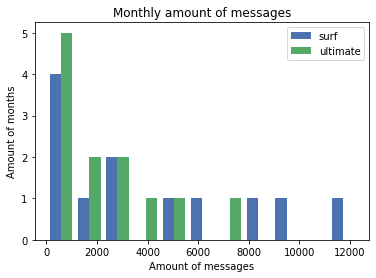

In [55]:
#bins from the lowest value to the maximum
bins = np.linspace(21, 12275, 12)
plt.hist([surf_msg, ult_msg], bins, label=['surf', 'ultimate'])
plt.legend(loc='upper right')
plt.title('Monthly amount of messages')
plt.xlabel('Amount of messages')
plt.ylabel('Amount of months')

plt.show()

#### Description

This graph shows that both lowest and highest amount of data usage belongs to the surf plan.
The surf plan's distribution is wider, and is more skewed to the right. (mean=4084, median=2862)
The ultimate's distribution is less wider, and has more months with lower values.(mean=2253, median=1658)

We can also see a decrease in the amount of months as the amount of messages increases.

Both plans have their highest amount of months(4 for surf, 5 for ultimate) in a relative low value area(below 2000).



### Conclusion


We have calculated the users_count, minutes, texts, and volume of data
the users of each plan require per month, the mean, variance, and
standard deviation, and stored it in plans_usage df.

We see that theres a strong positive correlation between the number of months(january - 1 , december- 12) to the number of users,
and to the usage metrics. we conclude that january always had the lowest values, and december had the highest values(for both plans) - as it had 
much more users.

By looking at our plots, we conclude the highest values in all metrics (calls,data usage, messages) belongs to surf plan,
which can be explained by the amount of users(surf grew from 2 users in jan to 318 users in dec,
                                              ultimate grew from 4 users in jan to 151 users in dec).

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v1:</b>
    
- Very nice visualisation of the data. Great that you managed to combine both plans on one graph for the comparison. 
- It's a matter of taste, but sometimes it is easier to analyze the data (spread, averages, etc.) for each feature using a boxplot in addition to histograms. If you have time and willing to practice, you can display two charts (histogram and a boxplot) using a two-column subplot.

        fig, axes = plt.subplots(1, 2, figsize=(16, 5))
        ....
        ...
</div>

## Test the hypotheses

### The average revenue from users of Ultimate and Surf calling plans differs.


Our null hypothesis (h0) will be: The average revenue from users of ultimate and surf calling plans is equal.

Our alternative hypothesis (h1) is based on h0 and will be: The average revenue from users of ultimate and surf calling plans differs.
    

Creating dataframes for the revenues for both plans

In [56]:
surf_revenue = df_merged.query('plan == "surf"')['monthly_revenue']
ult_revenue = df_merged.query('plan == "ultimate"')['monthly_revenue']

Declaring our alpha value - 5% which is the most common and recommended value

In [57]:
alpha = 0.05

Checking the varience values for both plans for the equal_var parameter using levene's test.

In [58]:
levene(surf_revenue, ult_revenue, center='median')

LeveneResult(statistic=405.7401019739098, pvalue=3.070976609395645e-83)

our resulted pvalue is a very low number, which means our variances are not equal.

In [59]:
results = st.ttest_ind(surf_revenue, ult_revenue, equal_var =False)

In [60]:
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 1.2184115852123163e-15
We reject the null hypothesis


our pvalue is very low, and we reject the null hypothesis which is - the average revenue from both plans is equal,
and therfore, we know our h1 is correct - the the average revenue from both plans differs.

### The average revenue from users in NY-NJ area is different from that of the users from other regions.


Our null hypothesis (h0) will be: The average revenue from users in NY-NJ area is equal from that of the users from other regions.

Our alternative hypothesis (h1) is based on h0 and will be: The average revenue from users in NY-NJ area is different from that of the users from other regions

function to get total revenue per user for region calculation

In [61]:
def total_rev(row):
    user=row['user_id']
    monthly=row['monthly_revenue']
    
    total_rev = df_merged.query('user_id == @user')['monthly_revenue'].sum()
        
    return total_rev

In [62]:
df_merged['total_rev'] = df_merged.apply(total_rev,axis=1)

In [63]:
data_frames = [df_users, df_merged]
df_test = reduce(lambda  left,right: pd.merge(left,right,on=['user_id'],
                                        how='left'), data_frames)

Dropping not identical columns in order to create duplicates,  to filter each row for each user.

In [64]:
df_test = df_test.drop(['month', 'call_duration','gb_used','msg_count','monthly_revenue'], axis = 1)

In [65]:
df_test.duplicated().sum()

1803

In [66]:
df_test.head()

,user_id,first_name,last_name,age,city,reg_date,plan_x,churn_date,plan_y,total_rev
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,None,ultimate,70.00
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,None,surf,250.09
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,None,surf,250.09
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,None,surf,250.09
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,None,surf,250.09


In [67]:
df_test = df_test.drop_duplicates()

In [68]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 2299
Data columns (total 10 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
plan_x        500 non-null object
churn_date    500 non-null object
plan_y        500 non-null object
total_rev     500 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 43.0+ KB


we have 500 rows, for 500 users, with the column of total revenue for region calculation.

Creating dataframes for the revenues for  NY-NJ area and other regions.

In [69]:
nynj_revenue = df_test[df_test.city.str.contains('NY-NJ')]['total_rev']

In [70]:
other_revenue = df_test[~df_test.city.str.contains('NY-NJ')]['total_rev']

In [71]:
nynj_revenue.std()

242.0980583781921

In [72]:
other_revenue.std()

276.6197377204259

Declaring our alpha value - 5% which is the most common and recommended value

In [73]:
alpha = 0.05

Checking the varience values for nynj and other regions for the equal_var parameter using levene's test.

In [74]:
levene(nynj_revenue, other_revenue, center='median')

LeveneResult(statistic=0.29759609065809506, pvalue=0.5856376488506585)

Our pvalue is higher than our alpha value (0.05%) and we will set the parameter equal_var=True

In [75]:
results = st.ttest_ind(nynj_revenue, other_revenue, equal_var =True)

In [76]:
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.6491879042432283
We can't reject the null hypothesis


our pvalue is high and higher than our alpha value, so we can't reject the null hypothesis which is - The average revenue from users in NY-NJ area is equal from that of the users from other regions.

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v1:</b>
    
- Great job! Hypotheses hav been formulated and tested correctly. Great that you additionally checked data that has been used for the test. 
- Nice that you've used Levene test to check variances.
- And you can additionally test data distribution type (e.g. Shapiro Wilk test). You can check various tests that can be used here - https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93

### Conclusion

After testing the hypotheses for:

    - The average revenue from users of Ultimate and Surf calling plans differs.
    
    - The average revenue from users in NY-NJ area is different from that of the users from other regions.
    
we were able to reject the null hypothesis for the first statement, which means the average revenue does differ between the plans.
we weren't able to reject the null hypothesis for the second statement, which means we cant say the avg revenue between nynj to others is different. 

the criterion used to test the hypotheses is alpha value of 0.05 (5%) as this is the best practice and most common used.
the null hypotheses were formulated to claim equality, as this is the h0 for comparing two population means,
and the alternative claims for difference between the population and is dependant if we can reject the h0 (equality) or not.


In [77]:
surf_revenue_total = df_test.query('plan_x == "surf"')['total_rev'].sum()
ult_revenue_total = df_test.query('plan_x == "ultimate"')['total_rev'].sum()
surf_revenue_mean = df_test.query('plan_x == "surf"')['total_rev'].mean()
ult_revenue_mean = df_test.query('plan_x == "ultimate"')['total_rev'].mean()


In [78]:
surf_revenue_total

95611.18

In [79]:
ult_revenue_total

52346.0

In [80]:
surf_revenue_mean 

282.03887905604716

In [81]:
ult_revenue_mean 

325.1304347826087

## Overall Conclusion

To summarize, we concluded many conclusions regarding different aspects of the data:
- In the data's preparation & processing stage:
1. we discovered 1 column with missing values - df_users.churn_date is the only column with missing values,
   but those missing values have a meaning - the plan was being used when this data was generated, filled with None.
2. All the date related columns have been changed to date type.
3. Data's usage measurement unit (MB) has been changed to GB.
4. Values of 0 in call_duration(19.4%) are considered unanswered call, and values of 0 in mb_used(13.1%) are considered 0 usage in the session.

- In the exploratory data analysis stage:
1. We see that theres a strong positive correlation between the number of months(january - 1 , december- 12) to the number of users, and to the usage metrics. we conclude that january always had the lowest values, and december had the highest values(for both plans) - as it had much more users.

2. we conclude the highest values in all metrics (calls,data usage, messages) belongs to surf plan, which can be explained by the amount of users(surf grew from 2 users in jan to 318 users in dec, ultimate grew from 4 users in jan to 151 users in dec)(with no 0 values- actual usage of the metrics).

3. The surf plan's users growth is much bigger than the ultimate plan's user growth.

- In the Tests of the hypotheses:
1. The average revenue from users of Ultimate and Surf calling plans differs.
   we were able to reject the null hypothesis for this statement, which means the average revenue does differ between the plans.

2. The average revenue from users in NY-NJ area is different from that of the users from other regions.
   we weren't able to reject the null hypothesis for the second statement, which means we cant say the avg revenue between nynj to others is different.


- Which prepaid plan bring more in revenue? (in order to adjust the advertising budget).

  surf plan total revenue: 95611.18
  
  ultimate plan total revenue: 52346

  surf plan mean(average per user) revenue: 282.03
  
  ultimate plan mean(average per user) revenue: 325.13

  We conclude that the surf plan brought more total revenue in 2018, and had a bigger user growth, but the ultimate plan
  brings more revenue per user.
  My suggestion is to advertise the ultimate plan more due to its small user growth, high revenue per user, and because the     user growth for the surf plan is much higher.

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v1:</b>
    
- Overall you conducted an outstanding research with correct interim findings, clean code and nice visualisation.
- I like your overall conclusion. It is very structured and provides insights to the business. 